# 🚢 Titanic Data Analysis - TASK 3
### Exploring Passenger Data & Survival Trends

This notebook provides an in-depth analysis of the Titanic dataset, examining survival rates, fare distributions, Machine learning model,and other key insights.


## Required Imports Modules:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline


# DATA USED FOR ANALYSIS:
#####  Source [Data Source](https://www.kaggle.com/c/titanic/data)

In [3]:
df = pd.read_csv('titanic.csv')
df_clean = df.copy()


# 🔧 Data Cleaning and Preprocessing

The following steps were taken to clean and preprocess the dataset:

1. **Eliminating Null Values:**
   - Identified and removed rows with critical missing values to ensure data integrity.
   
2. **Cleaning Missing Data:**
   - Imputed missing values for non-critical columns (e.g., Age) using median or mean imputation techniques.

3. **Dropping the 'Cabin' Column:**
   - The 'Cabin' column was dropped due to excessive missing values, making it unreliable for analysis.

4. **Data Transformation:**
   - Converted categorical variables into numerical formats using encoding techniques like one-hot encoding or label encoding (for columns like 'Embarked', 'Sex').

5. **Handling Outliers:**
   - Identified and handled outliers using techniques such as IQR (Interquartile Range) or Z-score methods to ensure the data's consistency and reduce their impact on analysis.



## 📊 PERFORMING THE DATA CLEANING:

In [5]:

df['Age'] = df['Age'].fillna(df['Age'].median())


df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])




if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])
else:
    print("Cabin_Removed")


print(*df.columns,sep="\n")

PassengerId
Survived
Pclass
Name
Sex
Age
SibSp
Parch
Ticket
Fare
Embarked


In [7]:
print(df.isnull().sum())


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [9]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

## 📊 Data Visualization

The following visualizations were performed to analyze various relationships in the dataset:

1. **Correlation between Fare Amount and Class with Embarking Location:**
   - Visualized the correlation between the fare amount and passenger class, with respect to their embarking location (e.g., Southampton, Cherbourg, Queenstown).



2. **Survival with Gender and Age:**
   - Explored the relationship between passenger survival rates and gender/age distribution to see if survival was influenced by these factors.

3. **Survival with Age and Parch:**
   - Analyzed how survival rates vary with age and the number of parents/children aboard (Parch).

4. **Survival with Class and Gender:**
   - Investigated how survival rates differ by passenger class and gender to uncover potential patterns in survival based on these variables.

5. **Survival with Pclass, Parch, and Gender:**
   - Visualized the combined influence of passenger class (Pclass), the number of parents/children aboard (Parch), and gender on survival rates.


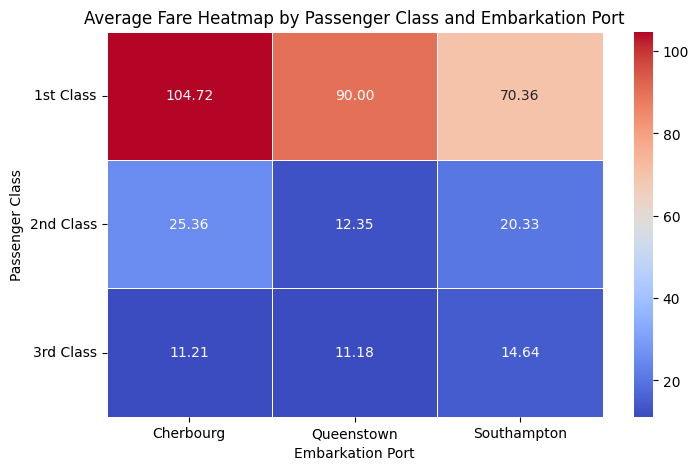

In [6]:

embark_mapping = {0: "Cherbourg", 1: "Queenstown", 2: "Southampton", 
                  "C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}


df_clean["Embarked"] = df_clean["Embarked"].replace(embark_mapping)


pivot_table = df_clean.pivot_table(values="Fare", index="Pclass", columns="Embarked", aggfunc="mean")


plt.figure(figsize=(8, 5))
ax = sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["1st Class", "2nd Class", "3rd Class"], rotation=0)

plt.title("Average Fare Heatmap by Passenger Class and Embarkation Port")
plt.xlabel("Embarkation Port")
plt.ylabel("Passenger Class")


plt.show()


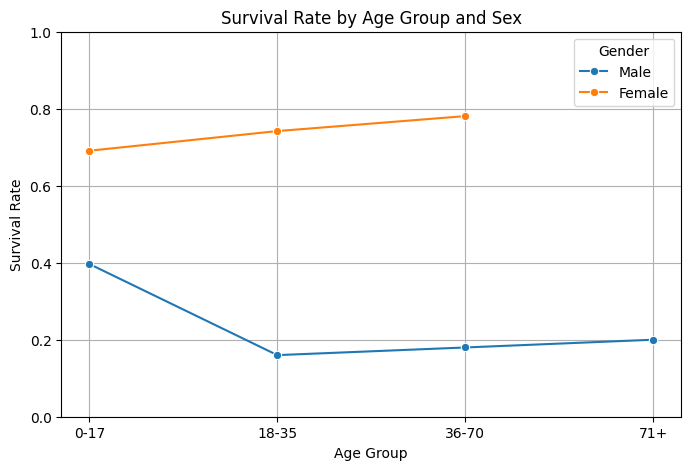

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


bins_custom = [0, 17, 35, 70, 100]  
labels_custom = ["0-17", "18-35", "36-70", "71+"]  


if {"Age", "Sex", "Survived"}.issubset(df.columns):
   
    df["AgeGroup_Custom"] = pd.cut(df["Age"], bins=bins_custom, labels=labels_custom)

   
    age_sex_survival = df.groupby(["AgeGroup_Custom", "Sex"], observed=False)["Survived"].mean().reset_index()

    
    plt.figure(figsize=(8, 5))
    ax = sns.lineplot(data=age_sex_survival, x="AgeGroup_Custom", y="Survived", hue="Sex", marker="o", linestyle="-")

    
    plt.xlabel("Age Group")
    plt.ylabel("Survival Rate")
    plt.title("Survival Rate by Age Group and Sex")
    plt.ylim(0, 1)
    plt.grid(True)

   
    legend = ax.legend(title="Gender")  
    legend.texts[0].set_text("Male")  
    legend.texts[1].set_text("Female")    

    plt.show()




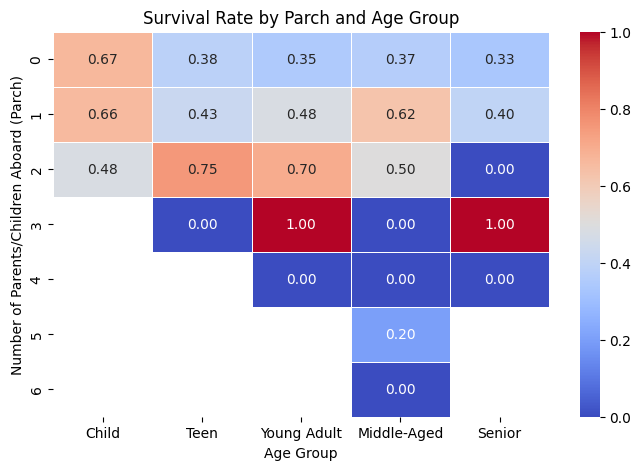

In [9]:

df_clean["AgeGroup"] = pd.cut(df_clean["Age"], bins=[0, 12, 18, 35, 50, 80], 
                              labels=["Child", "Teen", "Young Adult", "Middle-Aged", "Senior"])


parch_age_survival = df_clean.pivot_table(values="Survived", index="Parch", columns="AgeGroup", aggfunc="mean", observed=False)


plt.figure(figsize=(8, 5))
sns.heatmap(parch_age_survival, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

plt.xlabel("Age Group")
plt.ylabel("Number of Parents/Children Aboard (Parch)")
plt.title("Survival Rate by Parch and Age Group")
plt.show()


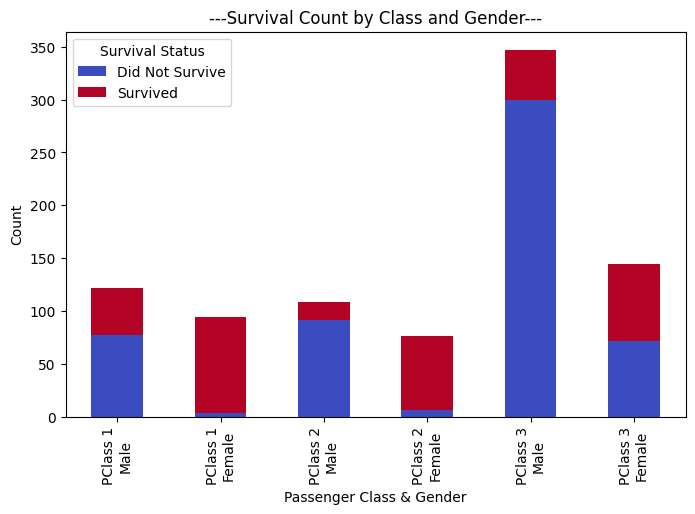

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


survival_counts = df.groupby(["Pclass", "Sex", "Survived"]).size().unstack()


survival_counts.index = survival_counts.index.map(lambda x: f"PClass {x[0]}\n{'Male' if x[1] == 0 else 'Female'}")


ax = survival_counts.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="coolwarm")


plt.legend(["Did Not Survive", "Survived"], title="Survival Status", loc="upper left")


plt.xlabel("Passenger Class & Gender")
plt.ylabel("Count")
plt.title("---Survival Count by Class and Gender---")

plt.show()




---

## 📊 Final Insight

Through the analysis, it became clear that **survival** was highly influenced by several key factors:

- **Class:** Passengers in higher classes had a significantly higher chance of survival, with first-class passengers being the most likely to survive.


- **Gender:** Women were prioritized, with their survival rates being notably higher than men's. This trend was particularly evident in higher classes, where women and children were given preference during evacuation.
- **Family Presence:** Passengers traveling with family (e.g., those with higher **Parch** and **SibSp** values) had a higher chance of survival, suggesting a protective effect from family groups.
- **Risk Factors:** Passengers traveling alone, especially **men in lower classes**, faced the highest risk of perishing, highlighting the vulnerability of those without family support and in less favorable positions during the disaster.

These insights show that **social factors**, such as class, gender, and family, played a significant role in determining survival outcomes on the Titanic. The prioritization of women and children, especially from higher classes, contrasted sharply with the higher mortality rates among men in the lower classes, who were more likely to be traveling alone.

---


# 🚀 MACHINE LEARNING MODEL  
#### Based on the insights gained from our previous analysis, we have incorporated key factors into the machine learning model. 📊  


In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("titanic.csv")
passenger_ids = df["PassengerId"]
df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])
df["Embarked"] = label_encoder.fit_transform(df["Embarked"])
X = df.drop(columns=["Survived"])
y = df["Survived"]
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[["Age", "Fare"]] = scaler.fit_transform(X[["Age", "Fare"]])

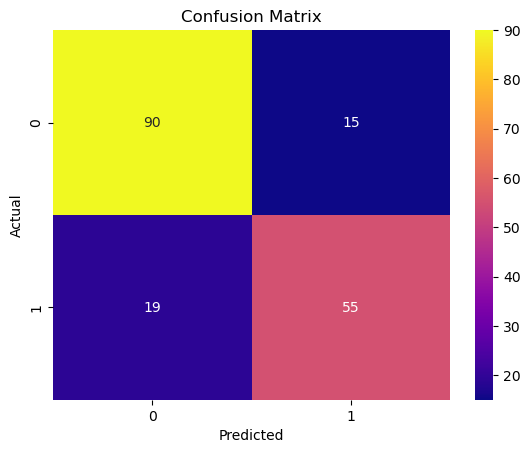

📝 Sample Predictions:
      PassengerId  Survived
709          710         0
439          440         0
840          841         0
720          721         1
39            40         1
..           ...       ...
433          434         0
773          774         0
25            26         0
84            85         1
10            11         1

[179 rows x 2 columns]
✅ Predictions saved to titanic_predictions_LinearRegression.csv


In [57]:
X_train, X_test, y_train, y_test, pid_train, pid_test = train_test_split(
    X_scaled, y, passenger_ids, test_size=0.2, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test).astype(int)
output_df = pd.DataFrame({"PassengerId": pid_test, "Survived": y_pred})
output_df.to_csv("titanic_predictions.csv", index=False)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="plasma")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
inal_predictions = pd.DataFrame({"PassengerId": passenger_ids.iloc[X_test.index], "Survived": y_pred})
print("📝 Sample Predictions:\n", final_predictions)
final_predictions.to_csv("titanic_predictions_LinearRegression.csv", index=False)
print("✅ Predictions saved to titanic_predictions_LinearRegression.csv")

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



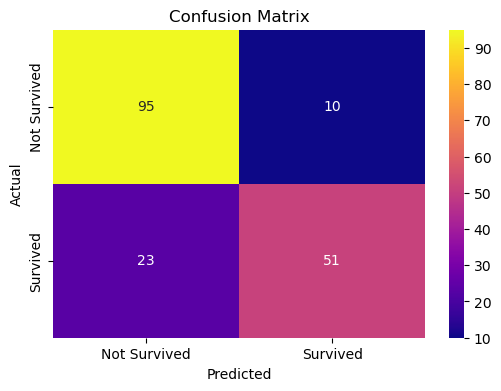

📝 Sample Predictions:
      PassengerId  Survived
709          710         0
439          440         0
840          841         0
720          721         1
39            40         1
..           ...       ...
433          434         0
773          774         0
25            26         0
84            85         1
10            11         1

[179 rows x 2 columns]
✅ Predictions saved to titanic_predictions_RandomForest.csv


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="plasma", 
            xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
final_predictions = pd.DataFrame({"PassengerId": passenger_ids.iloc[X_test.index], "Survived": y_pred})
print("📝 Sample Predictions:\n", final_predictions)
final_predictions.to_csv("titanic_predictions_RandomForest.csv", index=False)
print("✅ Predictions saved to titanic_predictions_RandomForest.csv")
